In [2]:
##  Import Necessary Libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
##  Load the Dataset
df = pd.read_csv(r"C:\Users\vidhi\OneDrive\Documents\Healthcare Prediction Using ML\Datasets\heart_disease_data.csv")  # Ensure the dataset file is present in the same directory
df.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
##  Data Preprocessing
X = df.drop(columns=["target"]) 
y = df["target"]

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# Train, predict and evaluate
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
        


Logistic Regression Accuracy: 0.8525
Decision Tree Accuracy: 0.8361
Random Forest Accuracy: 0.8525
SVM Accuracy: 0.8689
KNN Accuracy: 0.9016


In [7]:
# Save best model and scaler
with open("models/best_heart_model.sav", "wb") as f:
    pickle.dump((scaler, best_model), f)
    

print(f"\n✅ Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("📦 Saved to: models/best_heart_model.sav")



✅ Best Model: KNN with accuracy 0.9016
📦 Saved to: models/best_heart_model.sav


In [10]:
##  Save Best Model
with open("best_model.sav", "wb") as file:
    pickle.dump(best_model, file)

C:\Users\vidhi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


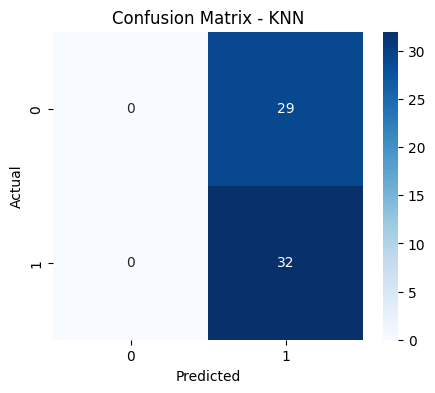

In [8]:
##  Confusion Matrix for Best Model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
##  Prediction with Best Model
input_data = (57,0,0,120,354,0,1,163,1,0.6,2,0,2)  

# Convert input data to numpy array & reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Predict using Best Model
prediction = best_model.predict(input_data_as_numpy_array)

# Display Prediction Result
if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")


The Person has Heart Disease
